In [10]:
import sqlite3
import pandas
from pandas import DataFrame
import matplotlib.pyplot as pyplot

In [11]:
database_path:str = "../db.sqlite3"
sql:str = "SELECT * FROM PerfectParking_parkingrequestlog"

In [12]:
connection = sqlite3.connect(database_path)
dataframe:DataFrame = pandas.read_sql_query(sql, connection)
connection.close()

In [13]:
dataframe.head()

,id,area_of_interest_latitude,area_of_interest_longitude,time_stamp,user_ip_address,user_id
0,1,52.0463,-9.515,2023-08-16 18:44:27.790256,127.0.0.1,NaN
1,2,52.0463,-9.515,2023-08-16 18:46:22.553170,127.0.0.1,14.0
2,3,52.0463,-9.515,2023-08-16 18:46:51.781508,127.0.0.1,14.0
3,4,52.0463,-9.515,2023-08-16 18:46:55.306892,127.0.0.1,14.0
4,5,52.0463,-9.515,2023-08-16 18:47:44.234370,127.0.0.1,14.0


In [14]:
dataframe['time_stamp'] = pandas.to_datetime(dataframe['time_stamp'])

In [15]:
#create a column with the hour of the day
dataframe['hour'] = dataframe['time_stamp'].dt.hour

In [16]:

#get dataframe info/column types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          12 non-null     int64         
 1   area_of_interest_latitude   12 non-null     float64       
 2   area_of_interest_longitude  12 non-null     float64       
 3   time_stamp                  12 non-null     datetime64[ns]
 4   user_ip_address             12 non-null     object        
 5   user_id                     11 non-null     float64       
 6   hour                        12 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 800.0+ bytes


## Visualize the parking requests

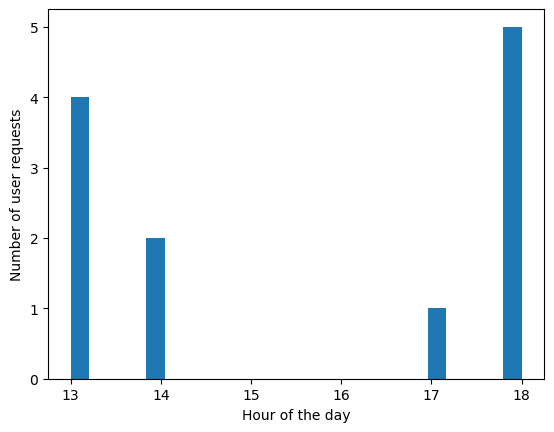

In [17]:
pyplot.xlabel('Hour of the day')
pyplot.ylabel('Number of user requests')
pyplot.hist(dataframe['hour'], bins=24);